<a href="https://colab.research.google.com/github/GraceHerchenroder/Thesis/blob/main/Thesis_Statistics_Discomfort_Newest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt

In [ ]:
# Performing two-way ANOVA
def statAnova(kinematic_data):
  dataframe = pd.DataFrame({'Gender': np.repeat(['women', 'men'], 5),
                          'Size': ['small', 'small', 'small', 'large', 'large', 'small', 'small', 'small', 'large', 'large'],
                          'Kinematic': kinematic_data[0][:]})
  model = ols('Kinematic ~ C(Gender) + C(Size) + C(Gender):C(Size)', data=dataframe).fit()
  result = sm.stats.anova_lm(model, typ=2)
  return result

def box_whisker(kinematic_data):
   small_men_data = kinematic_data[0][8:]
   large_men_data = kinematic_data[0][5:8]
   small_women_data = kinematic_data[0][:3]
   large_women_data = kinematic_data[0][3:5]
   fig, ax = plt.subplots(1, 2, figsize=(6, 10))
   ax[0].boxplot([small_men_data, large_men_data], labels = ['small', 'large'])
   ax[0].set_title('Men')
   ax[1].boxplot([small_women_data, large_women_data], labels = ['small', 'large'])
   ax[1].set_title('Women')
   plt.show()

In [ ]:
# Follow Up analysis: Significant
def significant(kinematic_data, p_values):
  small_men_data = kinematic_data[0][8:]
  large_men_data = kinematic_data[0][5:8]
  small_women_data = kinematic_data[0][:3]
  large_women_data = kinematic_data[0][3:5]

  [stat_small, p_small] = stats.ttest_ind(small_men_data, small_women_data);
  [stat_large, p_large] = stats.ttest_ind(large_men_data, large_women_data);
  [stat_women, p_women] = stats.ttest_ind(small_women_data, large_women_data);
  [stat_men, p_men] = stats.ttest_ind(small_men_data, large_men_data);

  result = multipletests([p_small, ,p_large, p_women, p_men], method = 'bonferroni')

  return result[1]

In [ ]:
# Walk
# Max
url_max_walk_discomfort = 'https://raw.githubusercontent.com/GraceHerchenroder/Thesis/main/max_walk_discomfort.csv'
max_walk_discomfort = pd.read_csv(url_max_walk_discomfort, header = None)

print('Maximum: Walking')
result_max_walk_disc = statAnova(max_walk_discomfort)
print(result_max_walk_disc)
if result_max_walk_disc['PR(>F)'][2] < 0.05:
  result = significant(max_walk_discomfort, result_max_walk_disc['PR(>F)'])
  print('Small: ', result[1], ', Large: ', result[2], ', Women: ', result[3], ', Men: ', result[4])
  if result[1] < result[0]:
    print('Small: Significant')
  if result[2] < result[0]:
    print('Large: Significant')
  if result[3] < result[0]:
    print('Women: Significant')
  if result[4] < result[0]:
    print('Men: Significant')
print('')

# Mean
url_mean_walk_discomfort = 'https://raw.githubusercontent.com/GraceHerchenroder/Thesis/main/mean_walk_discomfort.csv'
mean_walk_discomfort = pd.read_csv(url_mean_walk_discomfort, header = None)

print('Mean: Walking')
result_mean_walk_disc = statAnova(mean_walk_discomfort)
print(result_mean_walk_disc)
if result_mean_walk_disc['PR(>F)'][2] < 0.05:
  result = significant(mean_walk_discomfort, result_mean_walk_disc['PR(>F)'])
  print('Small: ', result[1], ', Large: ', result[2], ', Women: ', result[3], ', Men: ', result[4])
  if result[1] < result[0]:
    print('Small: Significant')
  if result[2] < result[0]:
    print('Large: Significant')
  if result[3] < result[0]:
    print('Women: Significant')
  if result[4] < result[0]:
    print('Men: Significant')
print('')

Maximum: Walking
                    sum_sq   df     F    PR(>F)
C(Gender)          0.30625  1.0  2.94  0.137236
C(Size)            0.03750  1.0  0.36  0.570456
C(Gender):C(Size)  0.03750  1.0  0.36  0.570456
Residual           0.62500  6.0   NaN       NaN

Mean: Walking
                     sum_sq   df         F    PR(>F)
C(Gender)          0.136111  1.0  2.603690  0.157742
C(Size)            0.005671  1.0  0.108487  0.753067
C(Gender):C(Size)  0.005671  1.0  0.108487  0.753067
Residual           0.313657  6.0       NaN       NaN



Mean


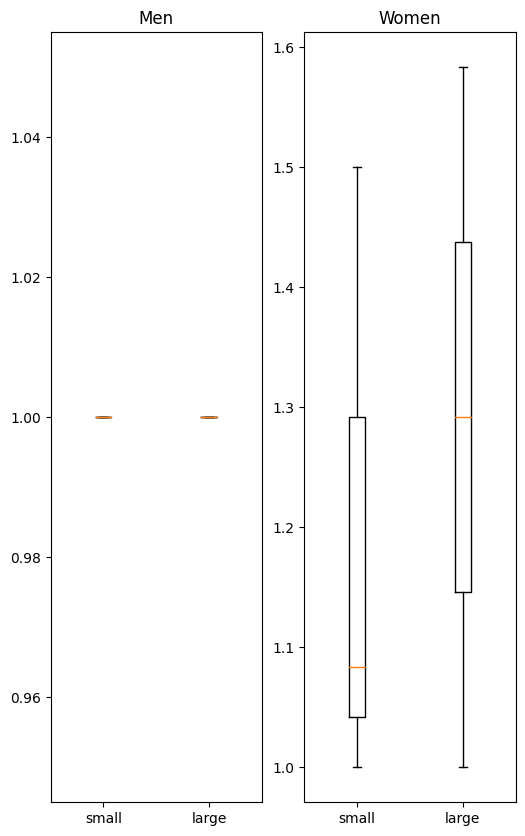

Max


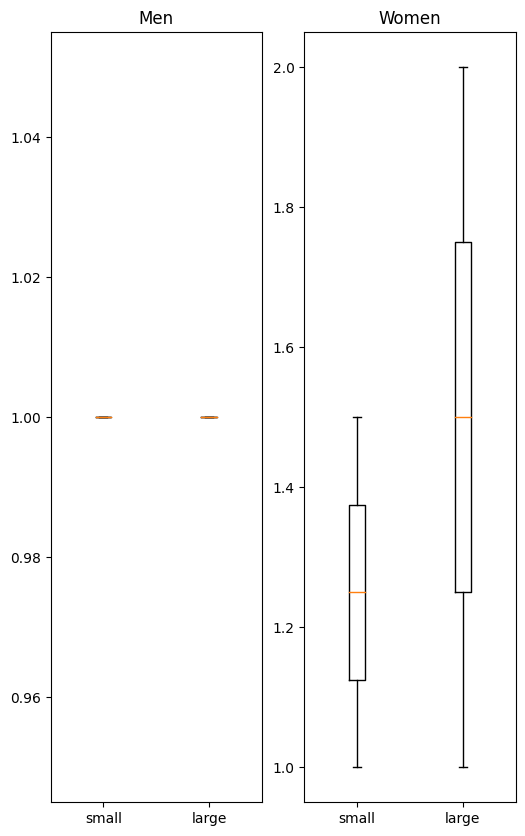

In [ ]:
print('Mean')
box_whisker(mean_walk_discomfort)
print('Max')
box_whisker(max_walk_discomfort)

In [ ]:
# Stand
# Max
url_max_stand_discomfort = 'https://raw.githubusercontent.com/GraceHerchenroder/Thesis/main/max_stand_discomfort.csv'
max_stand_discomfort = pd.read_csv(url_max_stand_discomfort, header = None)

print('Maximum: standing')
result_max_stand_disc = statAnova(max_stand_discomfort)
print(result_max_stand_disc)
if result_max_stand_disc['PR(>F)'][2] < 0.05:
  result = significant(max_stand_discomfort, result_max_stand_disc['PR(>F)'])
  print('Small: ', result[1], ', Large: ', result[2], ', Women: ', result[3], ', Men: ', result[4])
  if result[1] < result[0]:
    print('Small: Significant')
  if result[2] < result[0]:
    print('Large: Significant')
  if result[3] < result[0]:
    print('Women: Significant')
  if result[4] < result[0]:
    print('Men: Significant')
print('')

# Mean
url_mean_stand_discomfort = 'https://raw.githubusercontent.com/GraceHerchenroder/Thesis/main/mean_stand_discomfort.csv'
mean_stand_discomfort = pd.read_csv(url_mean_stand_discomfort, header = None)

print('Mean: standing')
result_mean_stand_disc = statAnova(mean_stand_discomfort)
print(result_mean_stand_disc)
if result_mean_stand_disc['PR(>F)'][2] < 0.05:
  result = significant(mean_stand_discomfort, result_mean_stand_disc['PR(>F)'])
  print('Small: ', result[1], ', Large: ', result[2], ', Women: ', result[3], ', Men: ', result[4])
  if result[1] < result[0]:
    print('Small: Significant')
  if result[2] < result[0]:
    print('Large: Significant')
  if result[3] < result[0]:
    print('Women: Significant')
  if result[4] < result[0]:
    print('Men: Significant')
print('')

Maximum: standing
                     sum_sq   df         F    PR(>F)
C(Gender)          0.552250  1.0  2.202271  0.188338
C(Size)            0.495042  1.0  1.974135  0.209612
C(Gender):C(Size)  0.198375  1.0  0.791083  0.408016
Residual           1.504583  6.0       NaN       NaN

Mean: standing
                     sum_sq   df         F    PR(>F)
C(Gender)          0.342250  1.0  1.764414  0.232364
C(Size)            0.238560  1.0  1.229858  0.309896
C(Gender):C(Size)  0.100042  1.0  0.515748  0.499657
Residual           1.163843  6.0       NaN       NaN



Mean


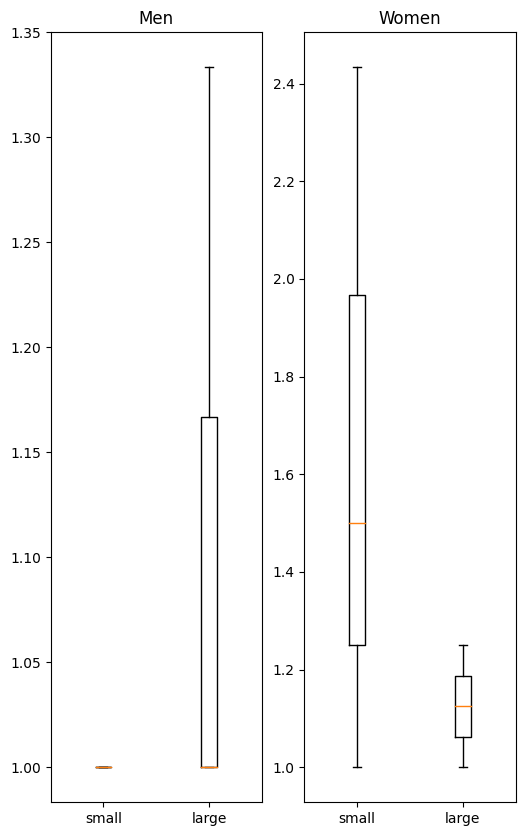

Max


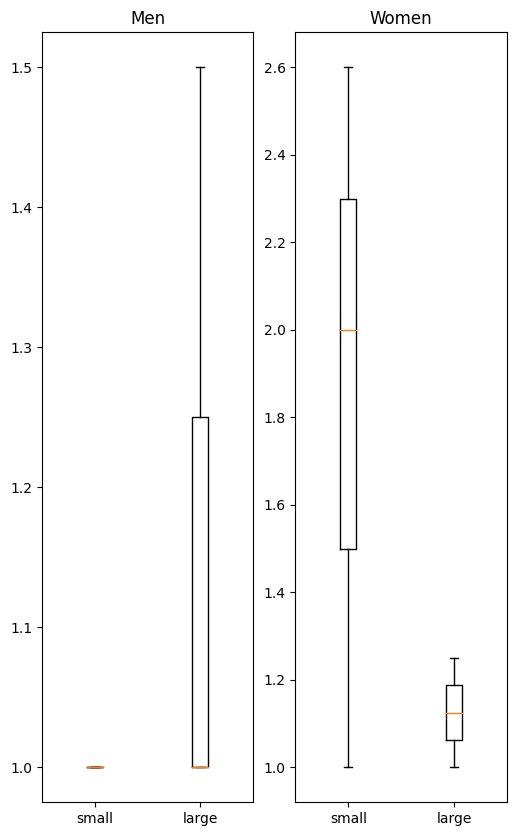

In [ ]:
print('Mean')
box_whisker(mean_stand_discomfort)
print('Max')
box_whisker(max_stand_discomfort)

In [ ]:
# Sit
# Max
url_max_sit_discomfort = 'https://raw.githubusercontent.com/GraceHerchenroder/Thesis/main/max_sit_discomfort.csv'
max_sit_discomfort = pd.read_csv(url_max_sit_discomfort, header = None)

print('Maximum: siting')
result_max_sit_disc = statAnova(max_sit_discomfort)
print(result_max_sit_disc)
if result_max_sit_disc['PR(>F)'][2] < 0.05:
  result = significant(max_sit_discomfort, result_max_sit_disc['PR(>F)'])
  print('Small: ', result[1], ', Large: ', result[2], ', Women: ', result[3], ', Men: ', result[4])
  if result[1] < result[0]:
    print('Small: Significant')
  if result[2] < result[0]:
    print('Large: Significant')
  if result[3] < result[0]:
    print('Women: Significant')
  if result[4] < result[0]:
    print('Men: Significant')
print('')

# Mean
url_mean_sit_discomfort = 'https://raw.githubusercontent.com/GraceHerchenroder/Thesis/main/mean_sit_discomfort.csv'
mean_sit_discomfort = pd.read_csv(url_mean_sit_discomfort, header = None)

print('Mean: siting')
result_mean_sit_disc = statAnova(mean_sit_discomfort)
print(result_mean_sit_disc)
if result_mean_sit_disc['PR(>F)'][2] < 0.05:
  result = significant(mean_sit_discomfort, result_mean_sit_disc['PR(>F)'])
  print('Small: ', result[1], ', Large: ', result[2], ', Women: ', result[3], ', Men: ', result[4])
  if result[1] < result[0]:
    print('Small: Significant')
  if result[2] < result[0]:
    print('Large: Significant')
  if result[3] < result[0]:
    print('Women: Significant')
  if result[4] < result[0]:
    print('Men: Significant')
print('')

Maximum: siting
                     sum_sq   df         F    PR(>F)
C(Gender)          0.930250  1.0  2.099953  0.197477
C(Size)            0.117042  1.0  0.264211  0.625617
C(Gender):C(Size)  0.117042  1.0  0.264211  0.625617
Residual           2.657917  6.0       NaN       NaN

Mean: siting
                     sum_sq   df         F    PR(>F)
C(Gender)          0.367361  1.0  2.099669  0.197504
C(Size)            0.041782  1.0  0.238809  0.642414
C(Gender):C(Size)  0.041782  1.0  0.238809  0.642414
Residual           1.049769  6.0       NaN       NaN



Mean


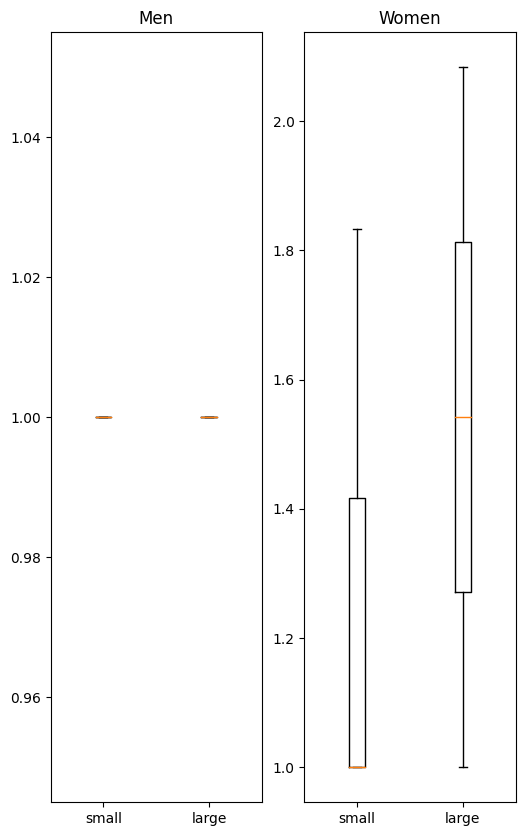

Max


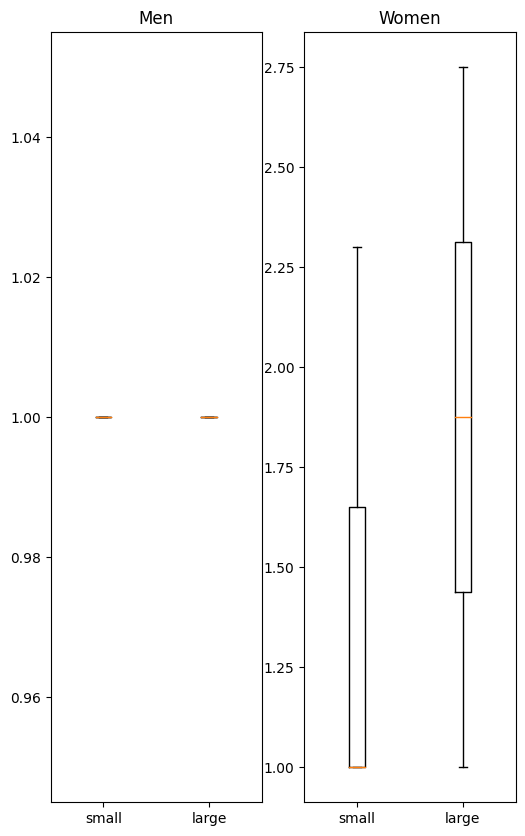

In [ ]:
print('Mean')
box_whisker(mean_sit_discomfort)
print('Max')
box_whisker(max_sit_discomfort)